In [6]:
## 20240413 Mid_Project DA IronHack 

## Business context: https://www.kaggle.com/competitions/optiver-trading-at-the-close
## Data context: https://www.kaggle.com/competitions/optiver-trading-at-the-close/data

    # Kagglers are challenged to predict the short term price movements during the 10 minute auction period. All the training data is contained within a single train.csv file.
    # In this competition, you are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and 
    # the closing auction of the stock. Information from the auction can be used to adjust prices, assess supply and demand dynamics, and identify trading opportunities.

    # Stock exchanges are fast-paced, high-stakes environments where every second counts. The intensity escalates as the trading day approaches its end, peaking in the critical final ten minutes.
    # These moments, often characterised by heightened volatility and rapid price fluctuations, play a pivotal role in shaping the global economic narrative for the day.
 
    # Each trading day on the Nasdaq Stock Exchange concludes with the Nasdaq Closing Cross auction. This process establishes the official closing prices for securities listed on the exchange. 
    # These closing prices serve as key indicators for investors, analysts and other market participants in evaluating the performance of individual securities and the market as a whole

    # This dataset contains historic data for the daily ten minute closing auction on the NASDAQ stock exchange. Your challenge is to predict the future price movements of stocks relative 
    # to the price future price movement of a synthetic index composed of NASDAQ-listed stocks.

## https://www.kaggle.com/code/tomforbes/optiver-trading-at-the-close-introduction
    # All size related columns are in USD terms.
    # All price related columns are converted to a price move relative to the stock wap (weighted average price) at the beginning of the auction period.
    # If we observe an auction imbalance, it indicates that at the current price there is buying or selling interest that will currently not get matched in the auction. 
    # We can therefore adjust our prediction upwards if there is a buy imbalance & downwards if there is a sell imbalance.
    # The term order book refers to an electronic list of buy (also known as bid) and sell (also known as ask) orders for a specific security or financial instrument organized by price level.
        # For this kind of order book in continuous trading, the highest bid price will always be less than the lowest ask price.     
    # The auction order book behaves slightly differently to the order book for continuous trading. ]
        # In this book, the orders are not immediately matched, but instead collected until the moment the auction ends.
        # The term imbalance refers to the number of unmatched shares.
    # Combining the two books can result in a more accurate reflection of the market's buying and selling interest at different price levels. This aids in better price discovery, allowing the market to reach a more accurate and fair equilibrium price when the auction uncrosses.
    # The hypothetical uncross price of combined book is called the near price. Nasdaq provides near price information 5 minutes before the closing cross.
    # Nasdaq also provides an indication of the fair price called the reference price

## About Nasdaq Closing Cross: https://www.nasdaqtrader.com/content/productsservices/Trading/ClosingCrossfaq.pdf
    # Almost 10% of Nasdaq’s average daily volume occurs in the closing auction. 
    # Providing true price and size discovery, the closing auction determines benchmark pricing for index funds and other investment strategies.

In [7]:
## Installing packages:
pip install yfinance

SyntaxError: invalid syntax (236925352.py, line 2)

In [8]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [13]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install scipy

In [15]:
pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [109]:
## Import libraries:
import pandas as pd  ## Data manipulation and analysis
import numpy as np  ## Numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import math as m
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler ## Normalization / Feature Scaling. Dataset values will be in between 0 and 1 after scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression   ## Objective of Linear Regression is to find a line that minimizes the prediction error of all the data points
from sklearn import metrics  ## Performance evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import yfinance as yf  ## The yfinance library offers Python users a seamless way to retrieve stock data from Yahoo Finance
from datetime import datetime, timedelta  ## Import datetime library for handling dates

In [17]:
## Import & visualize dataset
file = "train_optiver-trading-at-the-close.csv"
df = pd.read_csv(file)

In [18]:
df

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237975       195      480                540      2440722.89   
5237976       196      480                540       349510.47   
5237977       197      480                540            0.00   
5237978       198      480                540      1000898.84   
5237979       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                             -1         0.999896    1642214.25        NaN   
2                             -1         0.999561    1819368.03        NaN   
3                             -1         1.000171   18389745.62        NaN   
4                             -1         0.999532   17860614.95        NaN   
...                          ...              ...           ...        ...   
5237975                       -1         1.000317   28280361.74   0.999734   
5237976                       -1         1.000643    9187699.11   1.000129   
5237977                        0         0.995789   12725436.10   0.995789   
5237978                        1         0.999210   94773271.05   0.999210   
5237979                       -1         1.002129   24073677.32   1.000859   

         near_price  bid_price   bid_size  ask_price   ask_size       wap  \
0               NaN   0.999812   60651.50   1.000026    8493.03  1.000000   
1               NaN   0.999896    3233.04   1.000660   20605.09  1.000000   
2               NaN   0.999403   37956.00   1.000298   18995.00  1.000000   
3               NaN   0.999999    2324.90   1.000214  479032.40  1.000000   
4               NaN   0.999394   16485.54   1.000016     434.10  1.000000   
...             ...        ...        ...        ...        ...       ...   
5237975    0.999734   1.000317   32257.04   1.000434  319862.40  1.000328   
5237976    1.000386   1.000643  205108.40   1.000900   93393.07  1.000819   
5237977    0.995789   0.995789   16790.66   0.995883  180038.32  0.995797   
5237978    0.999210   0.998970  125631.72   0.999210  669893.00  0.999008   
5237979    1.001494   1.002129  250081.44   1.002447  300167.56  1.002274   

           target  time_id       row_id  
0       -3.029704        0        0_0_0  
1       -5.519986        0        0_0_1  
2       -8.389950        0        0_0_2  
3       -4.010200        0        0_0_3  
4       -7.349849        0        0_0_4  
...           ...      ...          ...  
5237975  2.310276    26454  480_540_195  
5237976 -8.220077    26454  480_540_196  
5237977  1.169443    26454  480_540_197  
5237978 -1.540184    26454  480_540_198  
5237979 -6.530285    26454  480_540_199  

[5237980 rows x 17 columns]

In [19]:
df.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 -5.519986   
2         NaN   0.999403  37956.00   1.000298   18995.00  1.0 -8.389950   
3         NaN   0.999999   2324.90   1.000214  479032.40  1.0 -4.010200   
4         NaN   0.999394  16485.54   1.000016     434.10  1.0 -7.349849   

   time_id row_id  
0        0  0_0_0  
1        0  0_0_1  
2        0  0_0_2  
3        0  0_0_3  
4        0  0_0_4

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [21]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

(5237980, 17)


In [22]:
# Remove rows with missing values in the "target" column
df = df.dropna(subset=["target"])

In [23]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

(5237892, 17)


In [24]:
5237980-5237892
## We conclude that 88 lines were removed in the previous step (missing values in the "target" column)

88

In [105]:
df.describe(include="all")

stock_id       date_id  seconds_in_bucket  imbalance_size  \
count   5.237892e+06  5.237892e+06       5.237892e+06    5.237760e+06   
unique           NaN           NaN                NaN             NaN   
top              NaN           NaN                NaN             NaN   
freq             NaN           NaN                NaN             NaN   
mean    9.928777e+01  2.415097e+02       2.700008e+02    5.715293e+06   
std     5.787187e+01  1.385313e+02       1.587450e+02    2.051591e+07   
min     0.000000e+00  0.000000e+00       0.000000e+00    0.000000e+00   
25%     4.900000e+01  1.220000e+02       1.300000e+02    8.453415e+04   
50%     9.900000e+01  2.420000e+02       2.700000e+02    1.113604e+06   
75%     1.490000e+02  3.610000e+02       4.100000e+02    4.190951e+06   
max     1.990000e+02  4.800000e+02       5.400000e+02    2.982028e+09   

        imbalance_buy_sell_flag  reference_price  matched_size     far_price  \
count              5.237892e+06     5.237760e+06  5.237760e+06  2.343638e+06   
unique                      NaN              NaN           NaN           NaN   
top                         NaN              NaN           NaN           NaN   
freq                        NaN              NaN           NaN           NaN   
mean              -1.189620e-02     9.999955e-01  4.510025e+07  1.001713e+00   
std                8.853447e-01     2.532497e-03  1.398413e+08  7.214705e-01   
min               -1.000000e+00     9.352850e-01  4.316610e+03  7.700000e-05   
25%               -1.000000e+00     9.987630e-01  5.279575e+06  9.963320e-01   
50%                0.000000e+00     9.999670e-01  1.288264e+07  9.998830e-01   
75%                1.000000e+00     1.001174e+00  3.270013e+07  1.003318e+00   
max                1.000000e+00     1.077488e+00  7.713682e+09  4.379531e+02   

          near_price     bid_price      bid_size     ask_price      ask_size  \
count   2.380800e+06  5.237760e+06  5.237892e+06  5.237760e+06  5.237892e+06   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    9.996601e-01  9.997263e-01  5.181445e+04  1.000264e+00  5.357658e+04   
std     1.216920e-02  2.499345e-03  1.114221e+05  2.510042e-03  1.293563e+05   
min     7.869880e-01  9.349150e-01  5.600000e-01  9.398270e-01  5.900000e-01   
25%     9.971000e-01  9.985290e-01  7.375160e+03  9.990290e-01  7.824000e+03   
50%     9.998890e-01  9.997280e-01  2.196980e+04  1.000207e+00  2.301867e+04   
75%     1.002590e+00  1.000905e+00  5.583240e+04  1.001414e+00  5.787932e+04   
max     1.309732e+00  1.077488e+00  3.028784e+07  1.077836e+00  5.440500e+07   

                 wap        target       time_id   row_id  
count   5.237760e+06  5.237892e+06  5.237892e+06  5237892  
unique           NaN           NaN           NaN  5237892  
top              NaN           NaN           NaN    0_0_0  
freq             NaN           NaN           NaN        1  
mean    9.999920e-01 -4.756125e-02  1.331003e+04      NaN  
std     2.497509e-03  9.452860e+00  7.619238e+03      NaN  
min     9.380080e-01 -3.852898e+02  0.000000e+00      NaN  
25%     9.987810e-01 -4.559755e+00  6.729000e+03      NaN  
50%     9.999970e-01 -6.020069e-02  1.334500e+04      NaN  
75%     1.001149e+00  4.409552e+00  1.990700e+04      NaN  
max     1.077675e+00  4.460704e+02  2.645400e+04      NaN

In [25]:
df.describe

<bound method NDFrame.describe of          stock_id  date_id  seconds_in_bucket  imbalance_size  \
0               0        0                  0      3180602.69   
1               1        0                  0       166603.91   
2               2        0                  0       302879.87   
3               3        0                  0     11917682.27   
4               4        0                  0       447549.96   
...           ...      ...                ...             ...   
5237975       195      480                540      2440722.89   
5237976       196      480                540       349510.47   
5237977       197      480                540            0.00   
5237978       198      480                540      1000898.84   
5237979       199      480                540      1884285.71   

         imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                              1         0.999812   13380276.64        NaN   
1                            

In [26]:
df.describe(exclude=np.number)

row_id
count   5237892
unique  5237892
top       0_0_0
freq          1

In [27]:
numericals =df._get_numeric_data()
# numericals =data.select_dtypes(np.number)
numericals.head()

stock_id  date_id  seconds_in_bucket  imbalance_size  \
0         0        0                  0      3180602.69   
1         1        0                  0       166603.91   
2         2        0                  0       302879.87   
3         3        0                  0     11917682.27   
4         4        0                  0       447549.96   

   imbalance_buy_sell_flag  reference_price  matched_size  far_price  \
0                        1         0.999812   13380276.64        NaN   
1                       -1         0.999896    1642214.25        NaN   
2                       -1         0.999561    1819368.03        NaN   
3                       -1         1.000171   18389745.62        NaN   
4                       -1         0.999532   17860614.95        NaN   

   near_price  bid_price  bid_size  ask_price   ask_size  wap    target  \
0         NaN   0.999812  60651.50   1.000026    8493.03  1.0 -3.029704   
1         NaN   0.999896   3233.04   1.000660   20605.09  1.0 -5.519986   
2         NaN   0.999403  37956.00   1.000298   18995.00  1.0 -8.389950   
3         NaN   0.999999   2324.90   1.000214  479032.40  1.0 -4.010200   
4         NaN   0.999394  16485.54   1.000016     434.10  1.0 -7.349849   

   time_id  
0        0  
1        0  
2        0  
3        0  
4        0

In [28]:
df.date_id.value_counts()

date_id
480    11000
353    11000
363    11000
362    11000
360    11000
       ...  
35     10529
2      10505
1      10505
3      10505
0      10505
Name: count, Length: 481, dtype: int64

In [29]:
df['date_id'].value_counts().sort_index()

## Confirming that we still have 200 distinct stock_id

date_id
0      10505
1      10505
2      10505
3      10505
4      10560
       ...  
476    11000
477    11000
478    11000
479    11000
480    11000
Name: count, Length: 481, dtype: int64

In [30]:
df['date_id'].nunique()

481

In [31]:
df.stock_id.value_counts()

stock_id
0      26455
137    26455
126    26455
127    26455
128    26455
       ...  
153    22605
199    21615
79     16500
135    15950
102    10230
Name: count, Length: 200, dtype: int64

In [32]:
df['stock_id'].value_counts().sort_index()

stock_id
0      26455
1      26455
2      26455
3      26455
4      26455
       ...  
195    26455
196    26455
197    26455
198    26455
199    21615
Name: count, Length: 200, dtype: int64

In [33]:
df[df['stock_id'] == 153].shape[0]

22605

In [34]:
# Find the maximum value in the 'reference_price' column
max_value = df['reference_price'].max()

# Find the minimum value in the 'reference_price' column
min_value = df['reference_price'].min()

print("Maximum value of 'reference_price':", max_value)
print("Minimum value of 'reference_price':", min_value)

Maximum value of 'reference_price': 1.077488
Minimum value of 'reference_price': 0.935285


<Axes: title={'center': 'Stock 0 on Day 0 - How the order book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

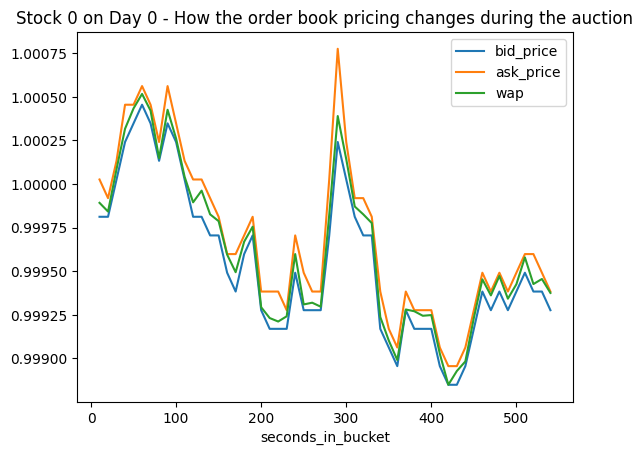

In [35]:
## stock_id ==0 & date_id ==0 ## as we chose the stock_id 0 during the date_id 0 only to ilustrate ths movement of prices
(
    df
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','bid_price','ask_price', 'wap']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the order book pricing changes during the auction')
)

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction'}, xlabel='seconds_in_bucket'>

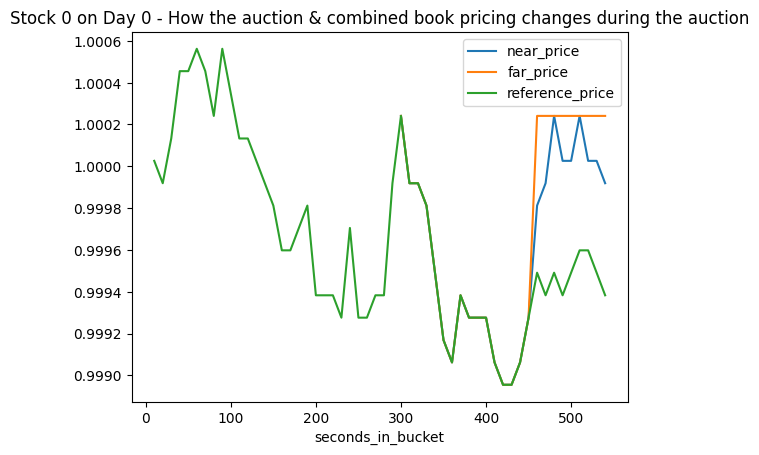

In [36]:
## stock_id ==0 & date_id ==300 ## as we chose the stock_id 0 during the date_id 0 only to ilustrate ths movement of prices
(
    df
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','near_price','far_price','reference_price']]
    .replace(0, np.nan)
    .set_index('seconds_in_bucket')
    .plot(title = 'Stock 0 on Day 0 - How the auction & combined book pricing changes during the auction')
    )

<Axes: title={'center': 'Stock 0 on Day 0 - How the auction sizing changes during the auction period'}, xlabel='seconds_in_bucket'>

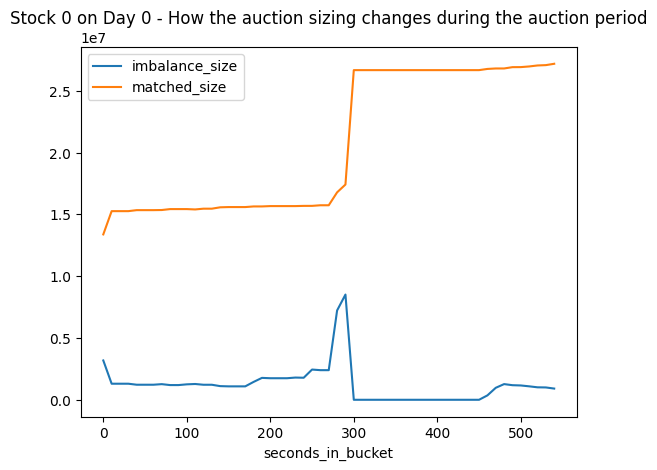

In [37]:
## stock_id ==0 & date_id ==0 ## as we chose the stock_id 0 during the date_id 0 only to ilustrate ths movement of prices
(
    df
    .query('stock_id ==0 & date_id ==0')
    [['seconds_in_bucket','imbalance_size','matched_size']]
    .set_index('seconds_in_bucket')
    .plot(title='Stock 0 on Day 0 - How the auction sizing changes during the auction period')
)

In [38]:
df['seconds_in_bucket'].nunique()

## We note that this df has 55 different time frames (measured by NASDAQ stock exchange every 10 seconds and indicated by the column "seconds_in_bucket" from 0 to 540)

55

In [39]:
## Group by 'stock_id' and 'date_id' and calculate the MEAN of the specified columns across all time frames. 
## This is the MEAN of prices for each stock, on each day. So all rows regardless of their "seconds_in_bucket" will be grouped together.

new_df = df.groupby(['stock_id', 'date_id']).agg({
    'reference_price': 'mean',
    'matched_size': 'mean',
    'imbalance_size': 'mean',
    'bid_price': 'mean',
    'bid_size': 'mean',
    'ask_price': 'mean'
}).reset_index()

new_df

stock_id  date_id  reference_price  matched_size  imbalance_size  \
0             0        0         0.999664  2.064913e+07    1.229794e+06   
1             0        1         0.999050  9.342939e+06    1.175555e+06   
2             0        2         0.998940  1.306975e+07    1.593084e+04   
3             0        3         0.998883  1.414532e+07    5.396968e+06   
4             0        4         1.000689  1.882983e+07    4.132774e+06   
...         ...      ...              ...           ...             ...   
95230       199      476         1.000570  2.089265e+07    2.294683e+06   
95231       199      477         0.997992  1.337857e+07    3.827352e+06   
95232       199      478         1.000950  1.080398e+07    1.095057e+06   
95233       199      479         1.002252  2.773323e+07    2.343566e+06   
95234       199      480         1.001367  1.582548e+07    4.367425e+06   

       bid_price       bid_size  ask_price  
0       0.999547   36503.148364   0.999697  
1       0.998903   39277.045455   0.999091  
2       0.998895   34400.522909   0.999039  
3       0.998834   45016.867818   0.999015  
4       1.000637   31768.836727   1.000925  
...          ...            ...        ...  
95230   1.000291   83208.703818   1.000614  
95231   0.997940   62637.859818   0.998261  
95232   1.000662   75990.765818   1.000982  
95233   1.002079   91019.942000   1.002402  
95234   1.001338  144654.755818   1.001656  

[95235 rows x 8 columns]

In [40]:
new_df.shape

## new_df has 95236 rows and 8 columns

(95235, 8)

In [41]:
## Adding the column "bid_ask_spread" (ask_price - bid_price) as a new feature of the dataframe.
## The bid-ask spread is largely dependant on liquidity—the more liquid a stock, the tighter spread https://www.investopedia.com/trading/basics-of-the-bid-ask-spread/

new_df['bid_ask_spread'] = new_df['ask_price'] - new_df['bid_price']

new_df

stock_id  date_id  reference_price  matched_size  imbalance_size  \
0             0        0         0.999664  2.064913e+07    1.229794e+06   
1             0        1         0.999050  9.342939e+06    1.175555e+06   
2             0        2         0.998940  1.306975e+07    1.593084e+04   
3             0        3         0.998883  1.414532e+07    5.396968e+06   
4             0        4         1.000689  1.882983e+07    4.132774e+06   
...         ...      ...              ...           ...             ...   
95230       199      476         1.000570  2.089265e+07    2.294683e+06   
95231       199      477         0.997992  1.337857e+07    3.827352e+06   
95232       199      478         1.000950  1.080398e+07    1.095057e+06   
95233       199      479         1.002252  2.773323e+07    2.343566e+06   
95234       199      480         1.001367  1.582548e+07    4.367425e+06   

       bid_price       bid_size  ask_price  bid_ask_spread  
0       0.999547   36503.148364   0.999697        0.000150  
1       0.998903   39277.045455   0.999091        0.000188  
2       0.998895   34400.522909   0.999039        0.000144  
3       0.998834   45016.867818   0.999015        0.000181  
4       1.000637   31768.836727   1.000925        0.000288  
...          ...            ...        ...             ...  
95230   1.000291   83208.703818   1.000614        0.000323  
95231   0.997940   62637.859818   0.998261        0.000321  
95232   1.000662   75990.765818   1.000982        0.000320  
95233   1.002079   91019.942000   1.002402        0.000323  
95234   1.001338  144654.755818   1.001656        0.000318  

[95235 rows x 9 columns]

In [42]:
## Confirming that we still have 200 distinct stock_id

new_df['stock_id'].nunique()

200

In [43]:
new_df['stock_id'].value_counts()

stock_id
0      481
97     481
125    481
126    481
127    481
      ... 
153    411
199    393
79     300
135    290
102    186
Name: count, Length: 200, dtype: int64

In [44]:
new_df.dtypes

stock_id             int64
date_id              int64
reference_price    float64
matched_size       float64
imbalance_size     float64
bid_price          float64
bid_size           float64
ask_price          float64
bid_ask_spread     float64
dtype: object

In [45]:
new_df.bid_ask_spread.dtypes

dtype('float64')

In [46]:
numerical_data = new_df.select_dtypes(include=np.number)
numerical_data

stock_id  date_id  reference_price  matched_size  imbalance_size  \
0             0        0         0.999664  2.064913e+07    1.229794e+06   
1             0        1         0.999050  9.342939e+06    1.175555e+06   
2             0        2         0.998940  1.306975e+07    1.593084e+04   
3             0        3         0.998883  1.414532e+07    5.396968e+06   
4             0        4         1.000689  1.882983e+07    4.132774e+06   
...         ...      ...              ...           ...             ...   
95230       199      476         1.000570  2.089265e+07    2.294683e+06   
95231       199      477         0.997992  1.337857e+07    3.827352e+06   
95232       199      478         1.000950  1.080398e+07    1.095057e+06   
95233       199      479         1.002252  2.773323e+07    2.343566e+06   
95234       199      480         1.001367  1.582548e+07    4.367425e+06   

       bid_price       bid_size  ask_price  bid_ask_spread  
0       0.999547   36503.148364   0.999697        0.000150  
1       0.998903   39277.045455   0.999091        0.000188  
2       0.998895   34400.522909   0.999039        0.000144  
3       0.998834   45016.867818   0.999015        0.000181  
4       1.000637   31768.836727   1.000925        0.000288  
...          ...            ...        ...             ...  
95230   1.000291   83208.703818   1.000614        0.000323  
95231   0.997940   62637.859818   0.998261        0.000321  
95232   1.000662   75990.765818   1.000982        0.000320  
95233   1.002079   91019.942000   1.002402        0.000323  
95234   1.001338  144654.755818   1.001656        0.000318  

[95235 rows x 9 columns]

In [47]:
new_df.isnull().sum()
# 3 nulls, but we decided to remove them noting it is not signicant to the sample 

stock_id           0
date_id            0
reference_price    3
matched_size       3
imbalance_size     3
bid_price          3
bid_size           0
ask_price          3
bid_ask_spread     3
dtype: int64

In [48]:
# Remove rows with missing values in the "reference_price" column
new_df = new_df.dropna(subset=["reference_price"])

In [49]:
# Print the shape of dataset in the form of (#rows, #columns)
print(new_df.shape)

(95232, 9)


In [50]:
95235-95232
## We conclude that there were only 3 rows removed due to NaN (missing values)

3

In [51]:
# Describe dataset's main statistics
print(new_df.describe(include="all"))

           stock_id       date_id  reference_price  matched_size  \
count  95232.000000  95232.000000     95232.000000  9.523200e+04   
mean      99.288432    241.507697         0.999996  4.510025e+07   
std       57.872280    138.531346         0.002118  1.376175e+08   
min        0.000000      0.000000         0.973249  3.216563e+04   
25%       49.000000    122.000000         0.998833  6.058992e+06   
50%       99.000000    242.000000         0.999954  1.361294e+07   
75%      149.000000    361.000000         1.001102  3.219259e+07   
max      199.000000    480.000000         1.044313  7.192703e+09   

       imbalance_size     bid_price      bid_size     ask_price  \
count    9.523200e+04  95232.000000  9.523200e+04  95232.000000   
mean     5.715293e+06      0.999726  5.181414e+04      1.000264   
std      1.658712e+07      0.002093  6.443774e+04      0.002105   
min      0.000000e+00      0.971857  4.341264e+02      0.974224   
25%      5.238617e+05      0.998601  2.015109e+04   

In [52]:
new_df.describe()

stock_id       date_id  reference_price  matched_size  \
count  95232.000000  95232.000000     95232.000000  9.523200e+04   
mean      99.288432    241.507697         0.999996  4.510025e+07   
std       57.872280    138.531346         0.002118  1.376175e+08   
min        0.000000      0.000000         0.973249  3.216563e+04   
25%       49.000000    122.000000         0.998833  6.058992e+06   
50%       99.000000    242.000000         0.999954  1.361294e+07   
75%      149.000000    361.000000         1.001102  3.219259e+07   
max      199.000000    480.000000         1.044313  7.192703e+09   

       imbalance_size     bid_price      bid_size     ask_price  \
count    9.523200e+04  95232.000000  9.523200e+04  95232.000000   
mean     5.715293e+06      0.999726  5.181414e+04      1.000264   
std      1.658712e+07      0.002093  6.443774e+04      0.002105   
min      0.000000e+00      0.971857  4.341264e+02      0.974224   
25%      5.238617e+05      0.998601  2.015109e+04      0.999091   
50%      1.644225e+06      0.999727  3.110649e+04      1.000181   
75%      4.729748e+06      1.000843  5.450567e+04      1.001338   
max      1.432570e+09      1.038383  2.800104e+06      1.044632   

       bid_ask_spread  
count    95232.000000  
mean         0.000538  
std          0.000510  
min          0.000038  
25%          0.000258  
50%          0.000402  
75%          0.000661  
max          0.009889

In [53]:
new_df.stock_id.value_counts()

stock_id
0      481
136    481
125    481
126    481
127    481
      ... 
153    411
199    393
79     300
135    290
102    186
Name: count, Length: 200, dtype: int64

In [54]:
new_df['stock_id'].value_counts().sort_index()

stock_id
0      481
1      481
2      481
3      481
4      481
      ... 
195    481
196    481
197    481
198    481
199    393
Name: count, Length: 200, dtype: int64

In [55]:
new_df['date_id'].value_counts().sort_index()

date_id
0      191
1      191
2      191
3      191
4      192
      ... 
476    200
477    200
478    200
479    200
480    200
Name: count, Length: 481, dtype: int64

In [56]:
# Find the maximum value in the 'reference_price' column
max_value = new_df['reference_price'].max()

# Find the minimum value in the 'reference_price' column
min_value = new_df['reference_price'].min()

print("Maximum value of 'reference_price':", max_value)
print("Minimum value of 'reference_price':", min_value)

Maximum value of 'reference_price': 1.0443134545454547
Minimum value of 'reference_price': 0.9732494545454545


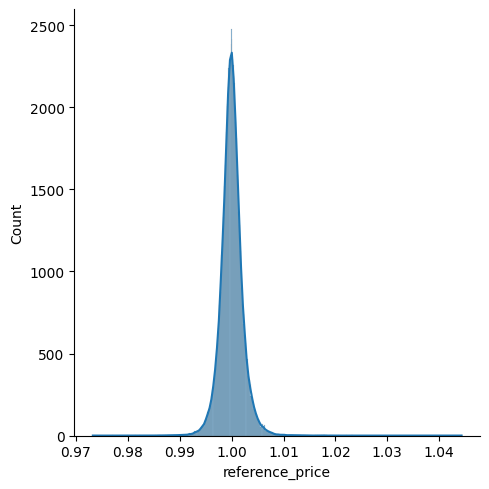

In [57]:
sns.displot(numerical_data.reference_price, kde=True)

In [58]:
##  Outlier Removal Using Interquartile Range (IQR)
Q1= new_df["reference_price"].quantile(0.25)
Q3= new_df["reference_price"].quantile(0.75)
IQR = Q3 -Q1
new_df_outliers_removed = new_df[(new_df["reference_price"] > Q1 - 1.5 * IQR) & (new_df["reference_price"] < Q3 + 1.5 * IQR)]

new_df_outliers_removed

stock_id  date_id  reference_price  matched_size  imbalance_size  \
0             0        0         0.999664  2.064913e+07    1.229794e+06   
1             0        1         0.999050  9.342939e+06    1.175555e+06   
2             0        2         0.998940  1.306975e+07    1.593084e+04   
3             0        3         0.998883  1.414532e+07    5.396968e+06   
4             0        4         1.000689  1.882983e+07    4.132774e+06   
...         ...      ...              ...           ...             ...   
95230       199      476         1.000570  2.089265e+07    2.294683e+06   
95231       199      477         0.997992  1.337857e+07    3.827352e+06   
95232       199      478         1.000950  1.080398e+07    1.095057e+06   
95233       199      479         1.002252  2.773323e+07    2.343566e+06   
95234       199      480         1.001367  1.582548e+07    4.367425e+06   

       bid_price       bid_size  ask_price  bid_ask_spread  
0       0.999547   36503.148364   0.999697        0.000150  
1       0.998903   39277.045455   0.999091        0.000188  
2       0.998895   34400.522909   0.999039        0.000144  
3       0.998834   45016.867818   0.999015        0.000181  
4       1.000637   31768.836727   1.000925        0.000288  
...          ...            ...        ...             ...  
95230   1.000291   83208.703818   1.000614        0.000323  
95231   0.997940   62637.859818   0.998261        0.000321  
95232   1.000662   75990.765818   1.000982        0.000320  
95233   1.002079   91019.942000   1.002402        0.000323  
95234   1.001338  144654.755818   1.001656        0.000318  

[91319 rows x 9 columns]

In [59]:
new_df_outliers_removed.isna().sum()

stock_id           0
date_id            0
reference_price    0
matched_size       0
imbalance_size     0
bid_price          0
bid_size           0
ask_price          0
bid_ask_spread     0
dtype: int64

In [60]:
# Find the maximum value in the 'reference_price' column
max_value = new_df_outliers_removed['reference_price'].max()

# Find the minimum value in the 'reference_price' column
min_value = new_df_outliers_removed['reference_price'].min()

print("Maximum value of 'reference_price':", max_value)
print("Minimum value of 'reference_price':", min_value)

Maximum value of 'reference_price': 1.0045062545454546
Minimum value of 'reference_price': 0.9954288909090909


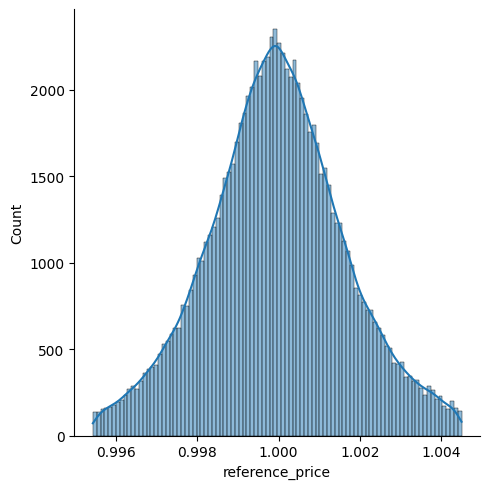

In [61]:
## Generate the sns.displot again as teh outliers were removed
sns.displot(new_df_outliers_removed.reference_price, kde=True)

In [107]:
new_df_outliers_removed.corr()

stock_id   date_id  reference_price  matched_size  \
stock_id         1.000000  0.007269         0.001504      0.036109   
date_id          0.007269  1.000000        -0.000112      0.001113   
reference_price  0.001504 -0.000112         1.000000      0.006514   
matched_size     0.036109  0.001113         0.006514      1.000000   
imbalance_size   0.031778  0.008438        -0.005521      0.746351   
bid_price        0.008311  0.001276         0.982342      0.028817   
bid_size         0.058725  0.039987         0.015767      0.113085   
ask_price       -0.006435 -0.001366         0.984780     -0.014707   
bid_ask_spread  -0.053295 -0.009549         0.011753     -0.157291   

                 imbalance_size  bid_price  bid_size  ask_price  \
stock_id               0.031778   0.008311  0.058725  -0.006435   
date_id                0.008438   0.001276  0.039987  -0.001366   
reference_price       -0.005521   0.982342  0.015767   0.984780   
matched_size           0.746351   0.028817  0.113085  -0.014707   
imbalance_size         1.000000   0.016166  0.103308  -0.026054   
bid_price              0.016166   1.000000 -0.002317   0.961725   
bid_size               0.103308  -0.002317  1.000000   0.020773   
ask_price             -0.026054   0.961725  0.020773   1.000000   
bid_ask_spread        -0.152612  -0.135405  0.083481   0.141269   

                 bid_ask_spread  
stock_id              -0.053295  
date_id               -0.009549  
reference_price        0.011753  
matched_size          -0.157291  
imbalance_size        -0.152612  
bid_price             -0.135405  
bid_size               0.083481  
ask_price              0.141269  
bid_ask_spread         1.000000

In [112]:
## Confidence Interval = CI = (mean - error, mean + error)

## mean = new_df_outliers_removed.feature.mean()
## error = t * s/(sqrt(n))

n = len(new_df_outliers_removed) ## calculating the sample size
mean = new_df_outliers_removed["reference_price"].mean()
t =stats.t.ppf(0.975, new_df_outliers_removed, len(new_df_outliers_removed)-1) ## 97,5% because the Gaussian is symmetric 
## there is 2,5% on left side and 2,5% right side (picture of Normal distribution)
s = new_df_outliers_removed["reference_price"].std()
error = s/m.sqrt(n) * t

In [113]:
confidence_interval = [mean - error, mean + error]
confidence_interval 

[array([[            nan,             nan,  4.89606445e-01, ...,
          4.89666551e-01,  4.89606451e-01, -5.58794933e+94],
        [            nan,  4.89606502e-01,  4.89606342e-01, ...,
          4.89666551e-01,  4.89606349e-01, -5.58794933e+94],
        [            nan,  4.89653460e-01,  4.89606324e-01, ...,
          4.89666551e-01,  4.89606340e-01, -5.58794933e+94],
        ...,
        [ 4.89666484e-01,  4.89666524e-01,  4.89606661e-01, ...,
          4.89666551e-01,  4.89606666e-01, -5.58794933e+94],
        [ 4.89666484e-01,  4.89666524e-01,  4.89606878e-01, ...,
          4.89666551e-01,  4.89606903e-01, -5.58794933e+94],
        [ 4.89666484e-01,  4.89666524e-01,  4.89606731e-01, ...,
          4.89666551e-01,  4.89606779e-01, -5.58794933e+94]]),
 array([[           nan,            nan, 1.51030928e+00, ...,
         1.51024917e+00, 1.51030927e+00, 5.58794933e+94],
        [           nan, 1.51030922e+00, 1.51030938e+00, ...,
         1.51024917e+00, 1.51030937e+00, 5.5879

<Axes: >

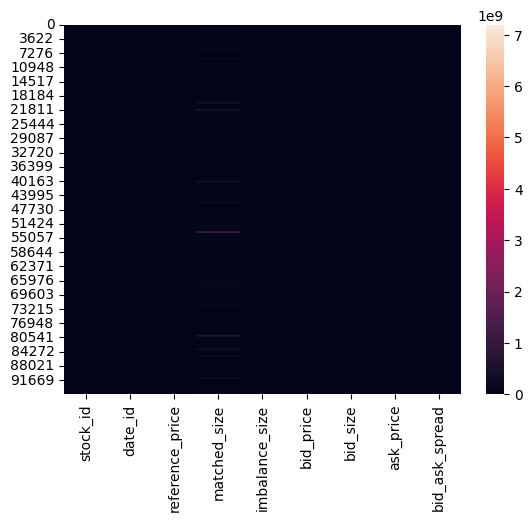

In [63]:
sns.heatmap(new_df_outliers_removed)

## This heatmap graph did not show too much information for us.

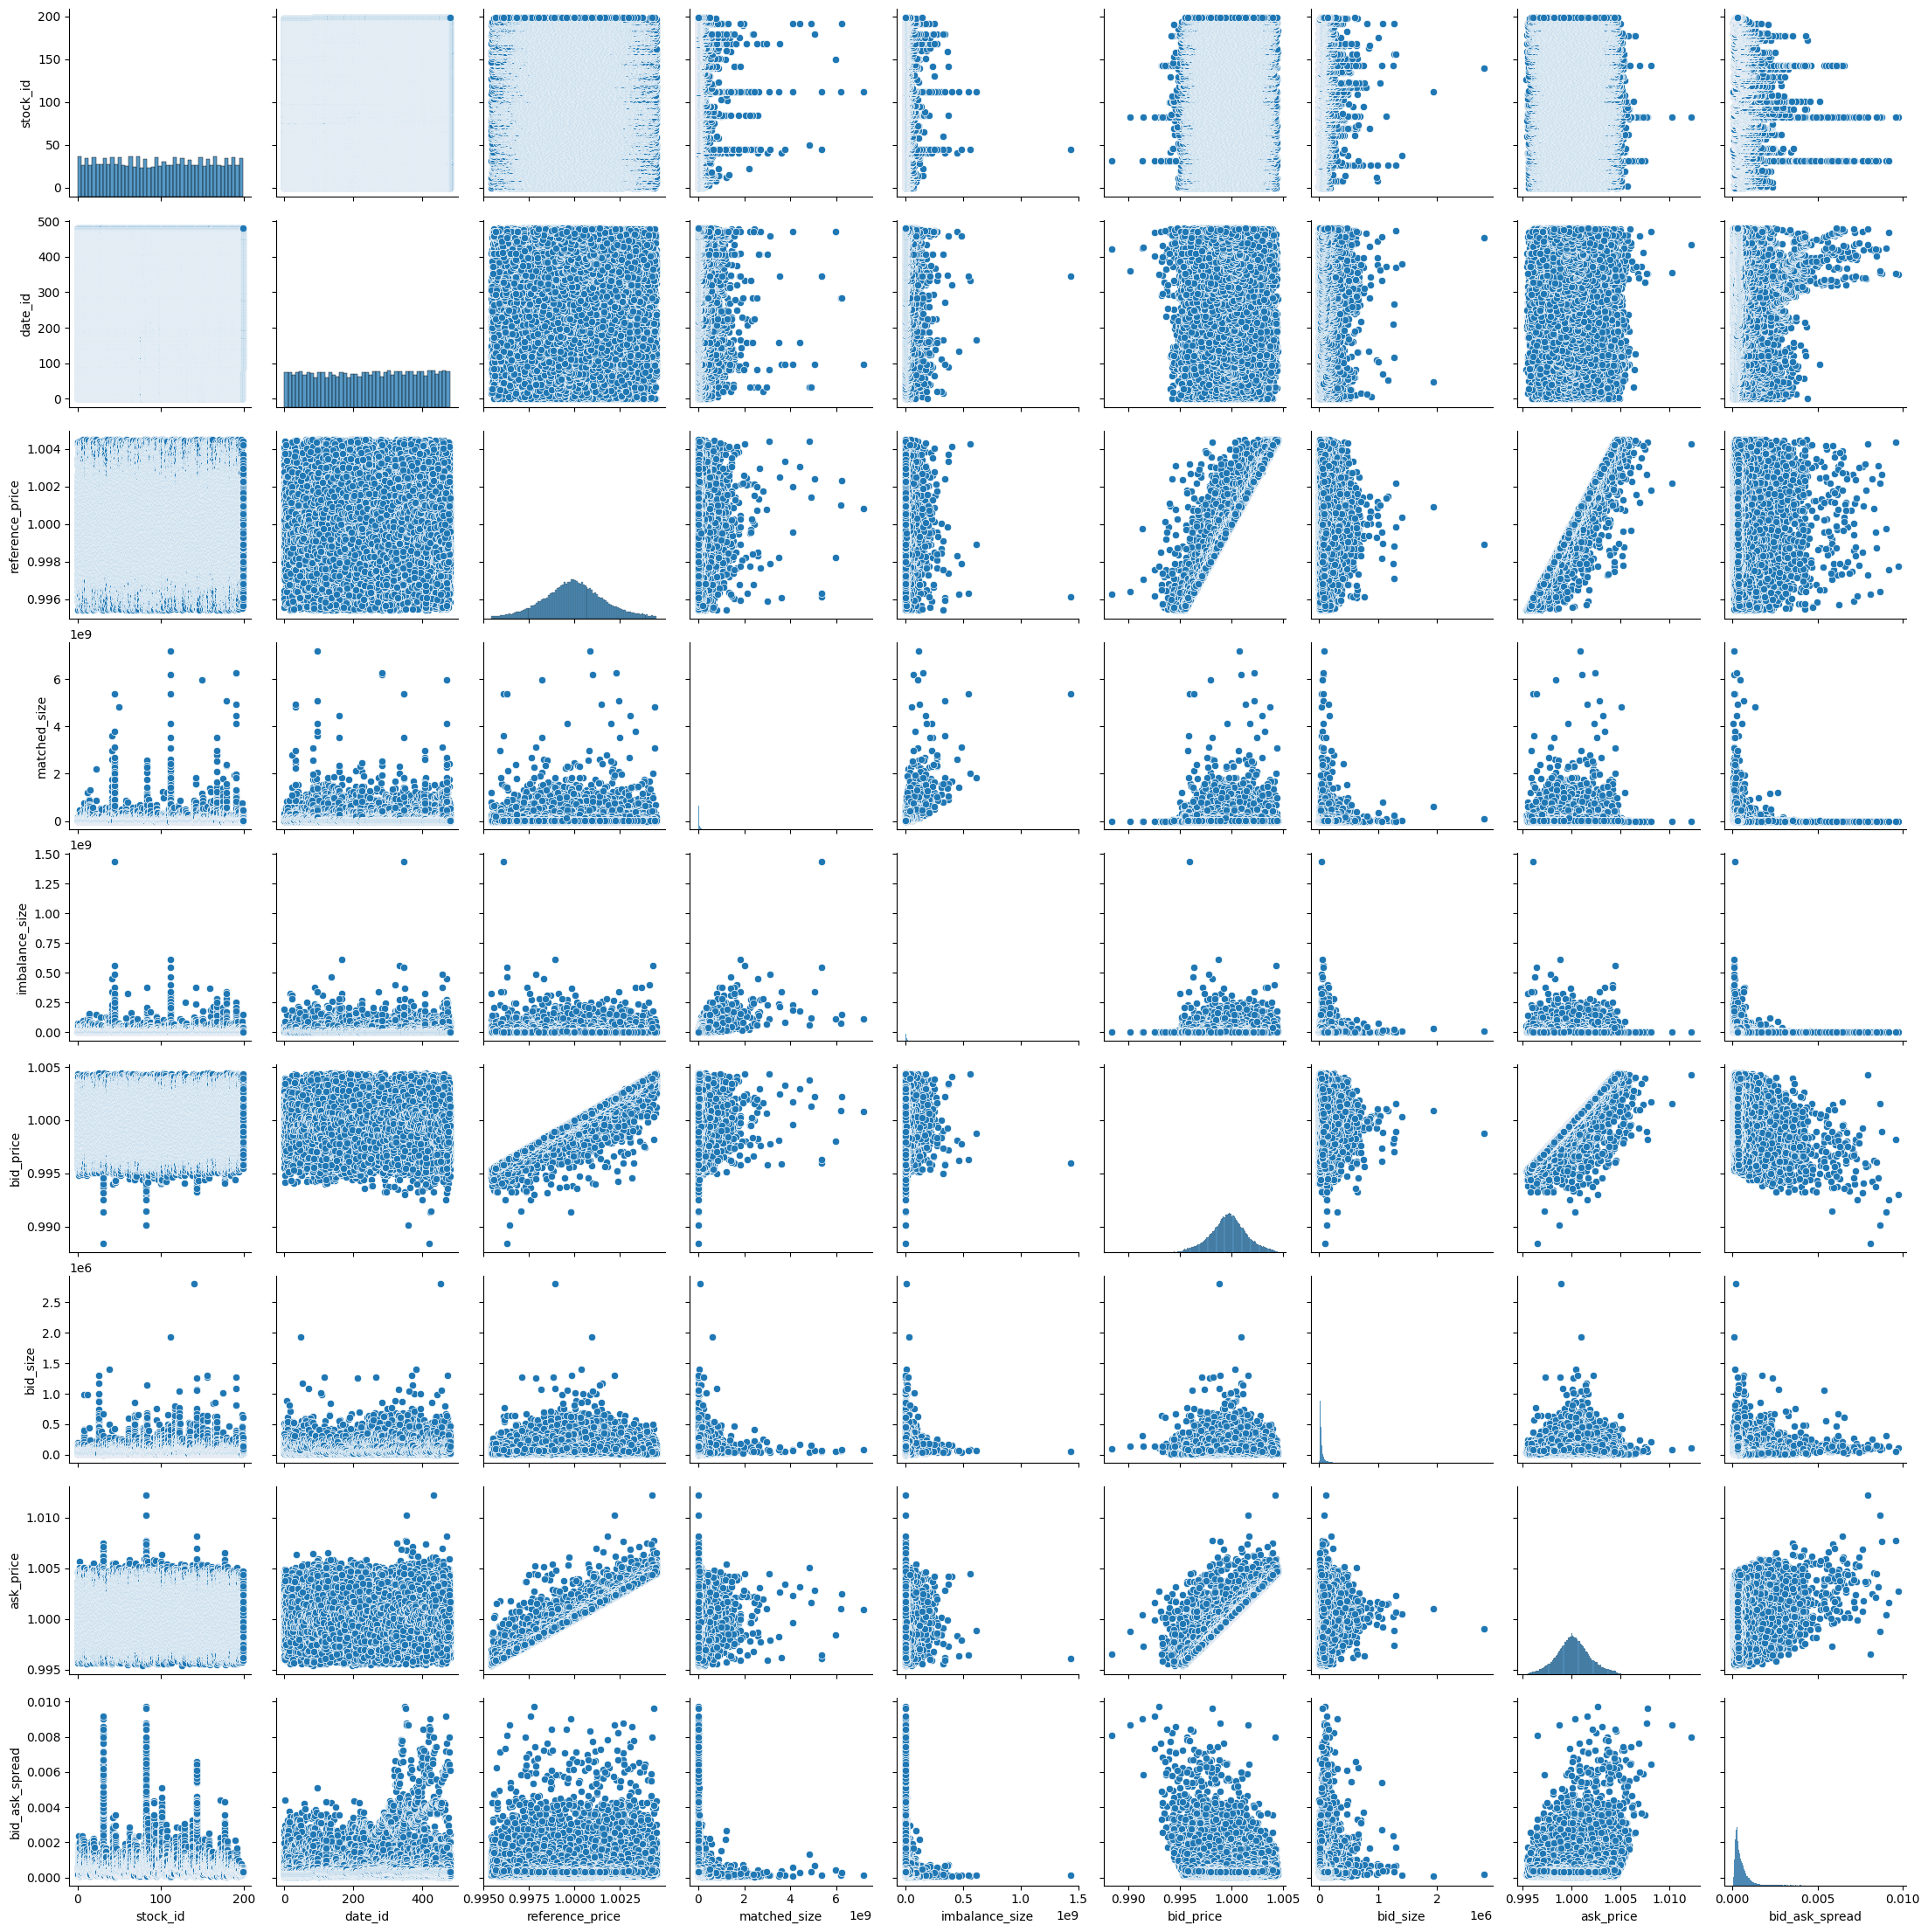

In [64]:
sns.pairplot(new_df_outliers_removed)

## This plot indicates to us that the feratures 'ask_price' and 'bid_price' are highly correlated with 'reference_price'.

In [65]:
## The feature "reference_price" refers to the price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price.
## All size related columns are in USD terms.
## All price related columns are converted to a price move relative to the stock wap (weighted average price) at the beginning of the auction period.

In [66]:
## Separation of the target variable Y with the explanatory features X
X = new_df_outliers_removed.drop(columns= "reference_price", axis=1)
y = new_df_outliers_removed.reference_price

In [67]:
## train test split of order 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
X_train.head()

stock_id  date_id  matched_size  imbalance_size  bid_price  \
35346        73      270  3.801279e+06    1.870642e+05   0.998694   
24188        50      138  1.660024e+07    4.639309e+06   0.996977   
38534        80      277  1.712261e+06    5.019730e+05   1.003661   
1202          2      240  2.942371e+06    6.667021e+04   1.000795   
2403          4      479  3.676064e+07    8.179675e+05   1.000418   

           bid_size  ask_price  bid_ask_spread  
35346  79928.245636   0.999131        0.000438  
24188  23895.793273   0.997538        0.000561  
38534   8445.702364   1.004463        0.000801  
1202    9053.385455   1.002096        0.001301  
2403   32848.761273   1.000579        0.000160

In [68]:
## Standardisation Scaling is a method used to normalize the range of independent variables or features of data. 
## In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.
scaler =  StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
y_train

35346    0.998912
24188    0.997168
38534    1.004108
1202     1.001563
2403     1.000491
           ...   
88144    0.999946
32095    0.999209
46607    1.002094
75236    1.003733
93140    0.997186
Name: reference_price, Length: 73055, dtype: float64

In [71]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
## Calculate the predictions and evaluate the results
predictions_train = model.predict(X_train)  ## Predictions on training set
predictions_test = model.predict(X_test)    ## Predictions on test set

In [73]:
## Evaluation of the model analysing scores on train set and test set
## Sklearn's model.score(X,y) calculation is based on co-efficient of determination i.e r^2
print("--- Assessing the performances of the model ---")
print("R2 score on training set : ", model.score(X_train, y_train))
print("R2 score on test set : ", model.score(X_test, y_test))

## Our results of r2 score are good, although it is a bit overfitting model (train score > test score)

--- Assessing the performances of the model ---
R2 score on training set :  0.9865416323505102
R2 score on test set :  0.9857070311015547


In [74]:
mean_squared_error(y_test, predictions_test), mean_squared_error(y_train, predictions_train)

(4.0146230721407395e-08, 3.85187321531861e-08)

In [75]:
mean_absolute_error(y_test, predictions_test), mean_absolute_error(y_train, predictions_train)

(0.00011506276039091209, 0.00011441740328197536)

In [76]:
X.columns

Index(['stock_id', 'date_id', 'matched_size', 'imbalance_size', 'bid_price',
       'bid_size', 'ask_price', 'bid_ask_spread'],
      dtype='object')

In [77]:
## Check out the model's coefficients
print("coefficients are: ", model.coef_)


coefficients are:  [ 1.03686573e-06 -1.10936574e-06  1.28267267e-08 -9.89103334e-08
 -1.16824805e+08  9.33690130e-06  1.16800386e+08 -3.20837523e+07]


In [78]:
feature_importance = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients": model.coef_
})

feature_importance = feature_importance[feature_importance['feature_names'] != 'stock_id']

feature_importance


feature_names  coefficients
1         date_id -1.109366e-06
2    matched_size  1.282673e-08
3  imbalance_size -9.891033e-08
4       bid_price -1.168248e+08
5        bid_size  9.336901e-06
6       ask_price  1.168004e+08
7  bid_ask_spread -3.208375e+07

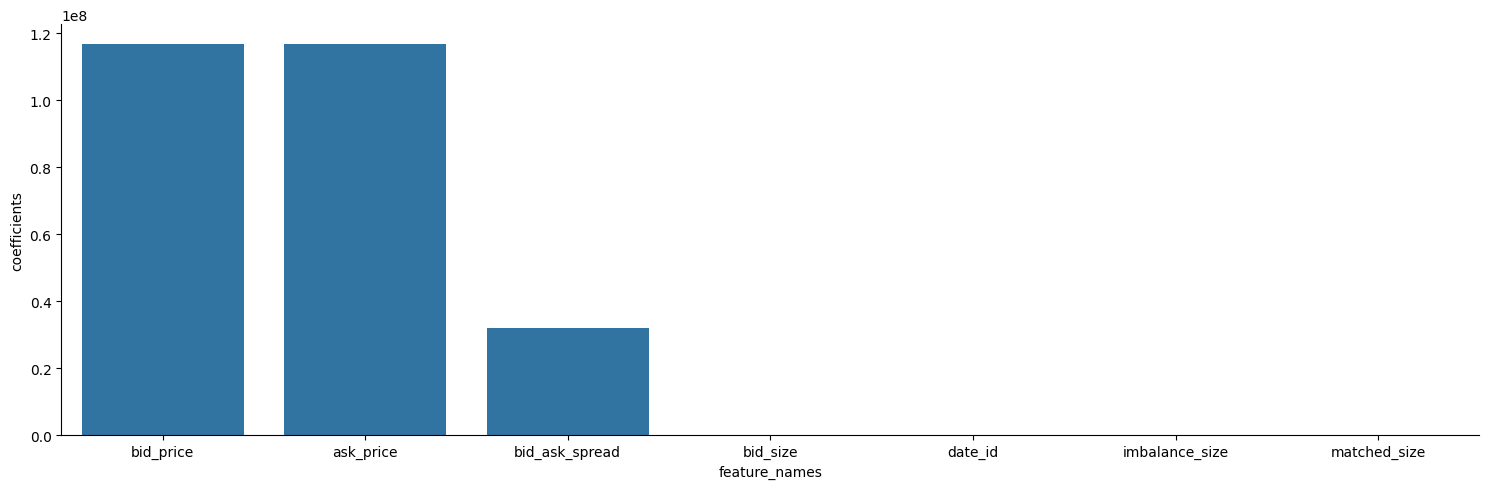

In [79]:
#### When we rank the all columns by importance using coefficients, it is clear that the bid_price and ask_price have features are highly correlated with 'reference_price'.

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names",
            y="coefficients",
            data=feature_importance.sort_values(by="coefficients", ascending=False),
            kind="bar",
            aspect=30/10) # Resize graph

In [80]:
## Check out the model's constant
print("Constant is: ", model.intercept_)

Constant is:  0.9999557172736241


In [81]:
print(new_df_outliers_removed.columns)

Index(['stock_id', 'date_id', 'reference_price', 'matched_size',
       'imbalance_size', 'bid_price', 'bid_size', 'ask_price',
       'bid_ask_spread'],
      dtype='object')


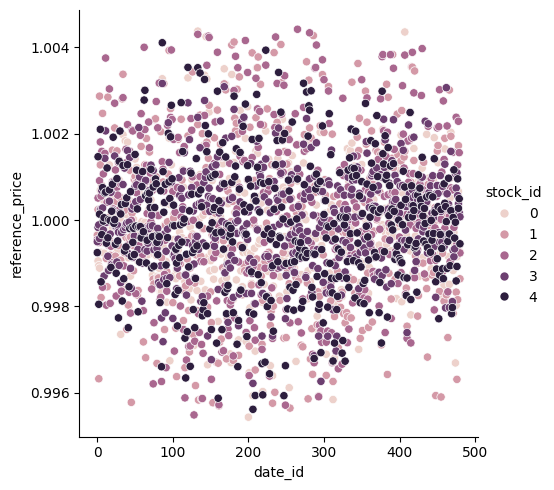

In [82]:
## Selecting the first 5 stock_id (from 200) of the dataframe to ilustrate the graphic
filtered_five_stocks = new_df_outliers_removed[new_df_outliers_removed['stock_id'].isin([0, 1, 2, 3, 4])]

sns.relplot(
    data=filtered_five_stocks,
    x="date_id", y="reference_price", hue="stock_id")

In [85]:
## Selecting the first 5 stock_id (from 200) of the dataframe to ilustrate the graphic
filtered_five_stocks = new_df_outliers_removed[new_df_outliers_removed['stock_id'].isin([0, 1, 2, 3, 4])]

import plotly.express as px
filtered_five_stocks = px.data.iris()
fig = px.scatter(df, x="date_id", y="reference_price", color="stock_id")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

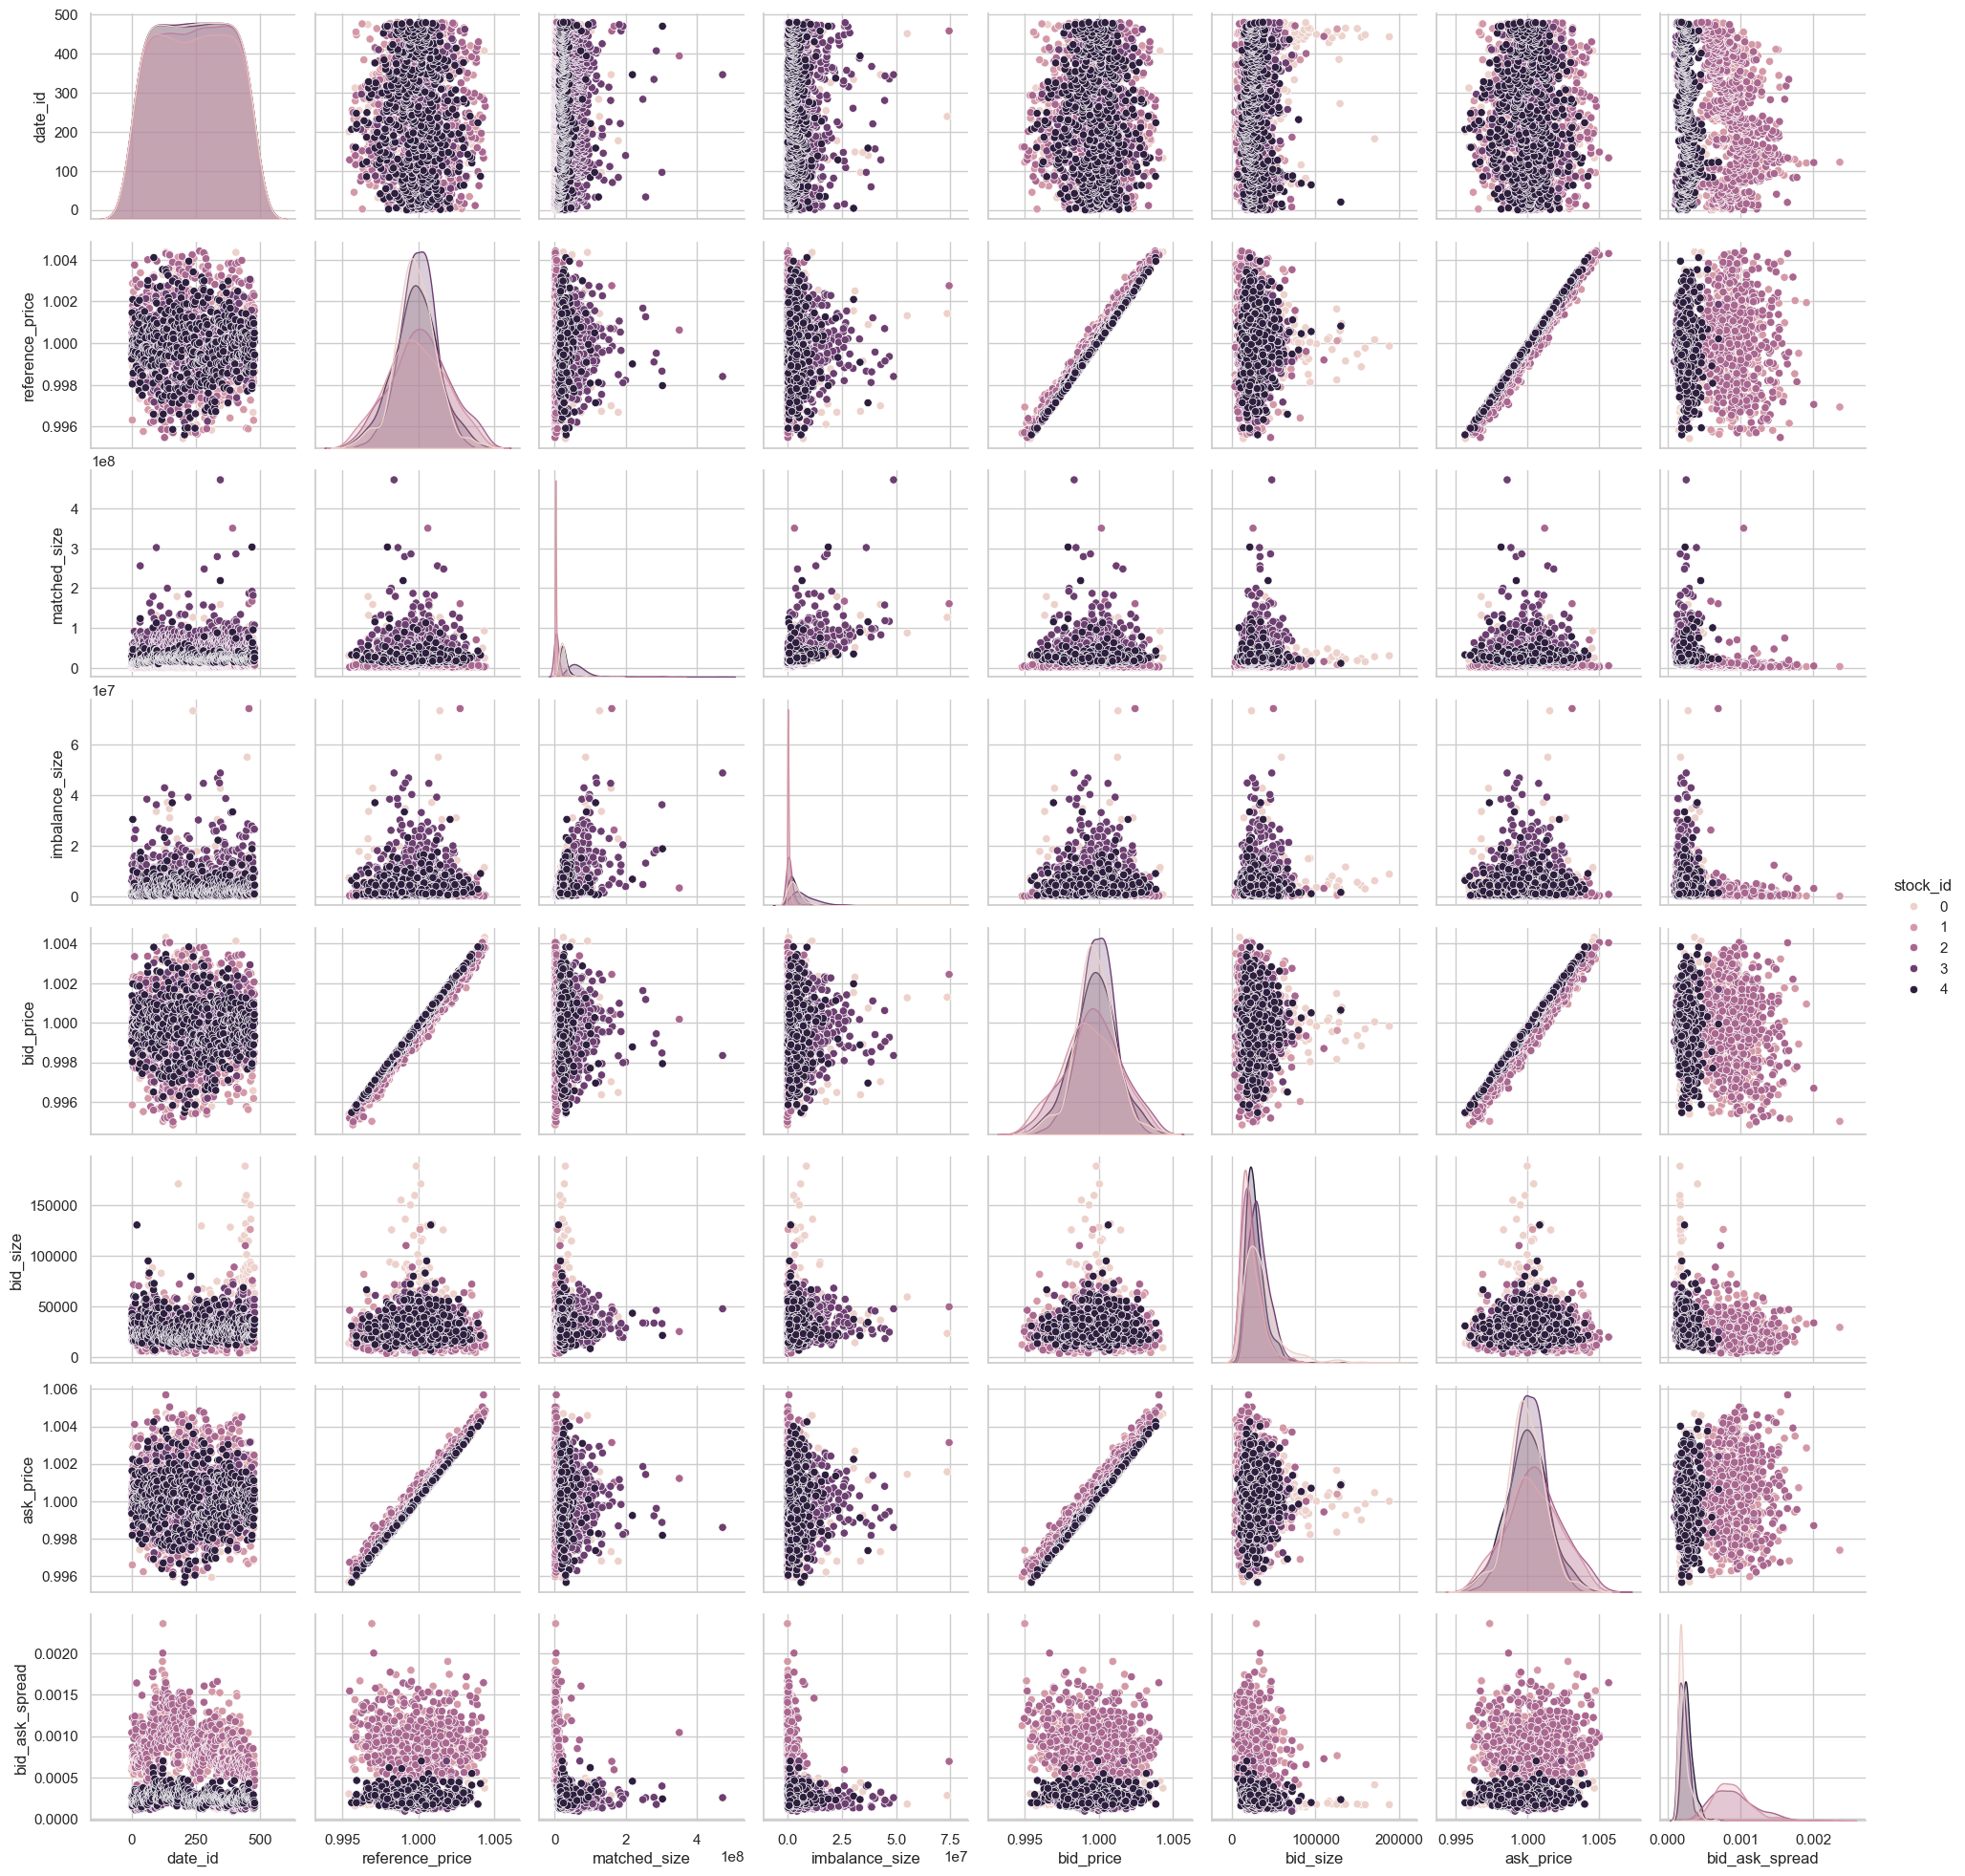

In [ ]:
## Selecting the first 5 stock_id (from 200) of the dataframe to ilustrate the graphic
filtered_five_stocks = new_df_outliers_removed[new_df_outliers_removed['stock_id'].isin([0, 1, 2, 3, 4])]

sns.pairplot(data=filtered_five_stocks, hue="stock_id")     ## Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset

<Axes: xlabel='date_id', ylabel='reference_price'>

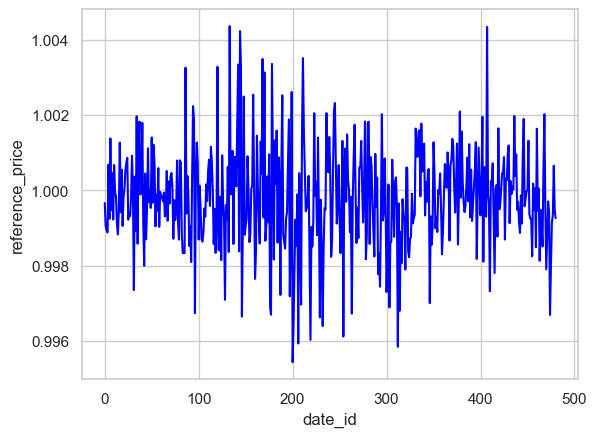

In [ ]:
## Selecting the first stock_id (from 200) of the dataframe to ilustrate the graphic
filtered_one_stock = new_df_outliers_removed[new_df_outliers_removed['stock_id'].isin([0])]

sns.lineplot(x = "date_id", y = "reference_price", data = filtered_one_stock, color = "blue")

<Axes: title={'center': 'Stock_id 0 - How the order book pricing changes during the 480 days'}, xlabel='date_id'>

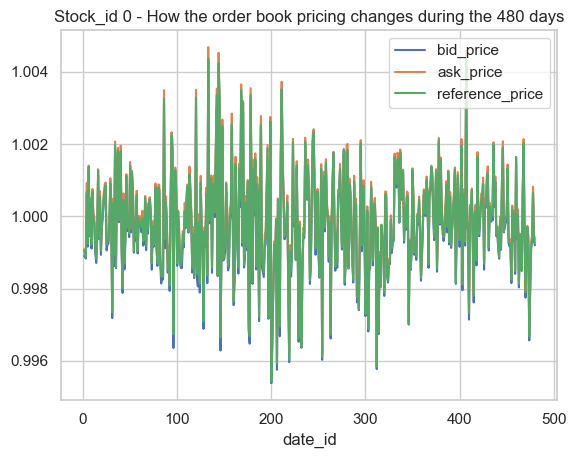

In [ ]:
(
    new_df_outliers_removed
    .query('stock_id ==0')
    [['date_id','bid_price','ask_price', 'reference_price']]
    .replace(0, np.nan)
    .set_index('date_id')
    .plot(title='Stock_id 0 - How the order book pricing changes during the 480 days')
)

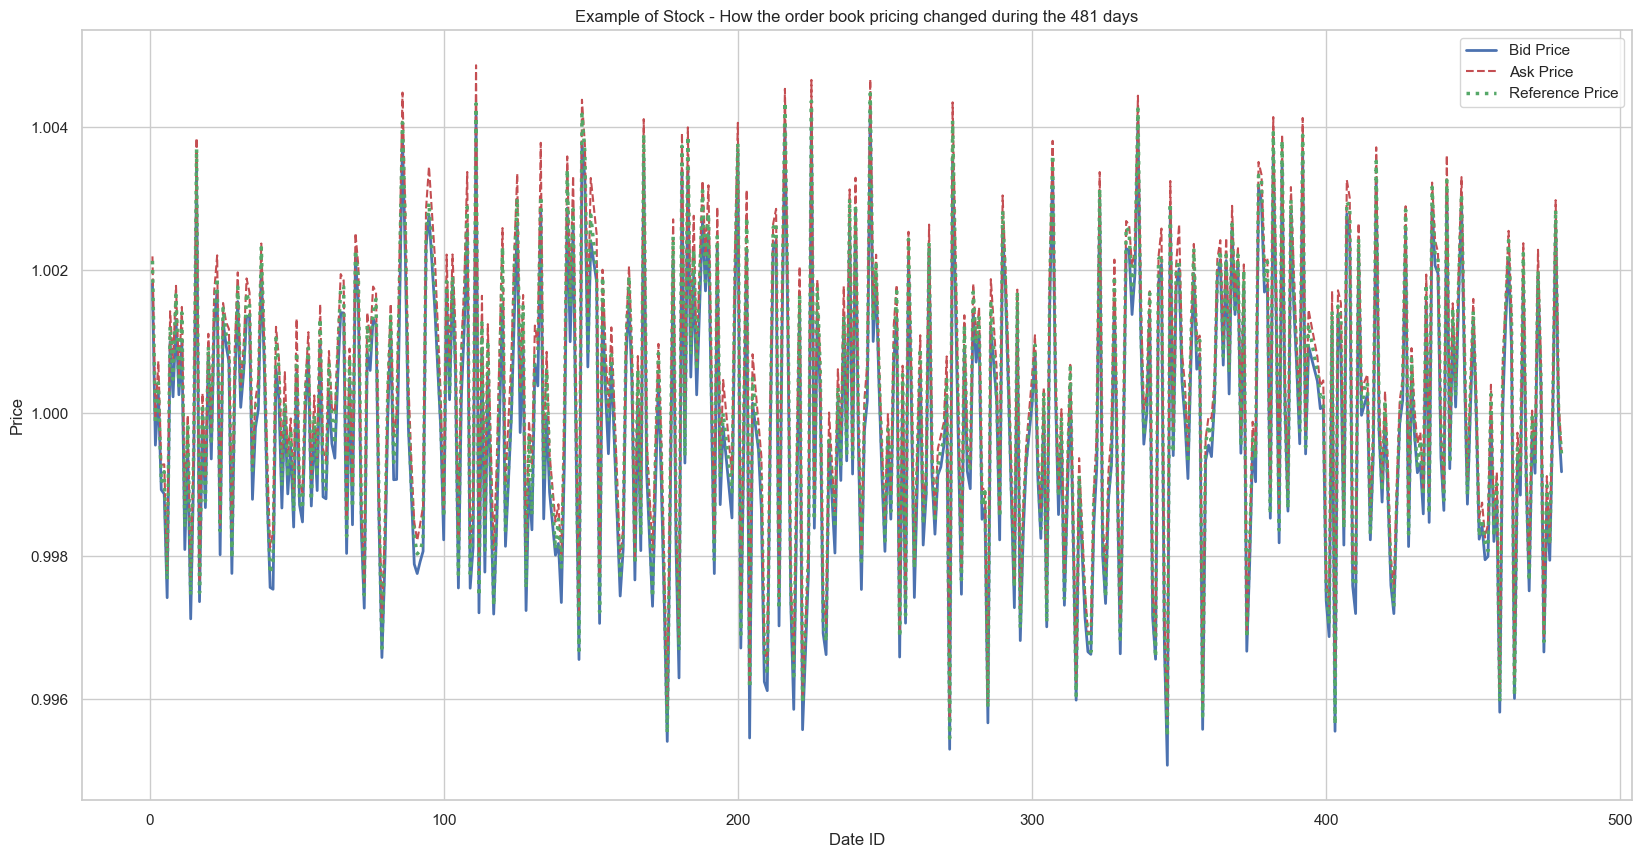

In [ ]:
# Choosing the stock_id 5 only to ilustrate our example.
data_filtered = new_df_outliers_removed.query('stock_id == 5')[['date_id', 'bid_price', 'ask_price', 'reference_price']].replace(0, np.nan).set_index('date_id')

# Start plotting
plt.figure(figsize=(20, 10))

# Plot each line separately
data_filtered['bid_price'].plot(style='b-', linewidth=2, label='Bid Price')
data_filtered['ask_price'].plot(style='r--', linewidth=1.5, label='Ask Price')
data_filtered['reference_price'].plot(style='g:', linewidth=2.5, label='Reference Price')

# Adding titles and labels
plt.title('Example of Stock - How the order book pricing changed during the 481 days')
plt.xlabel('Date ID')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

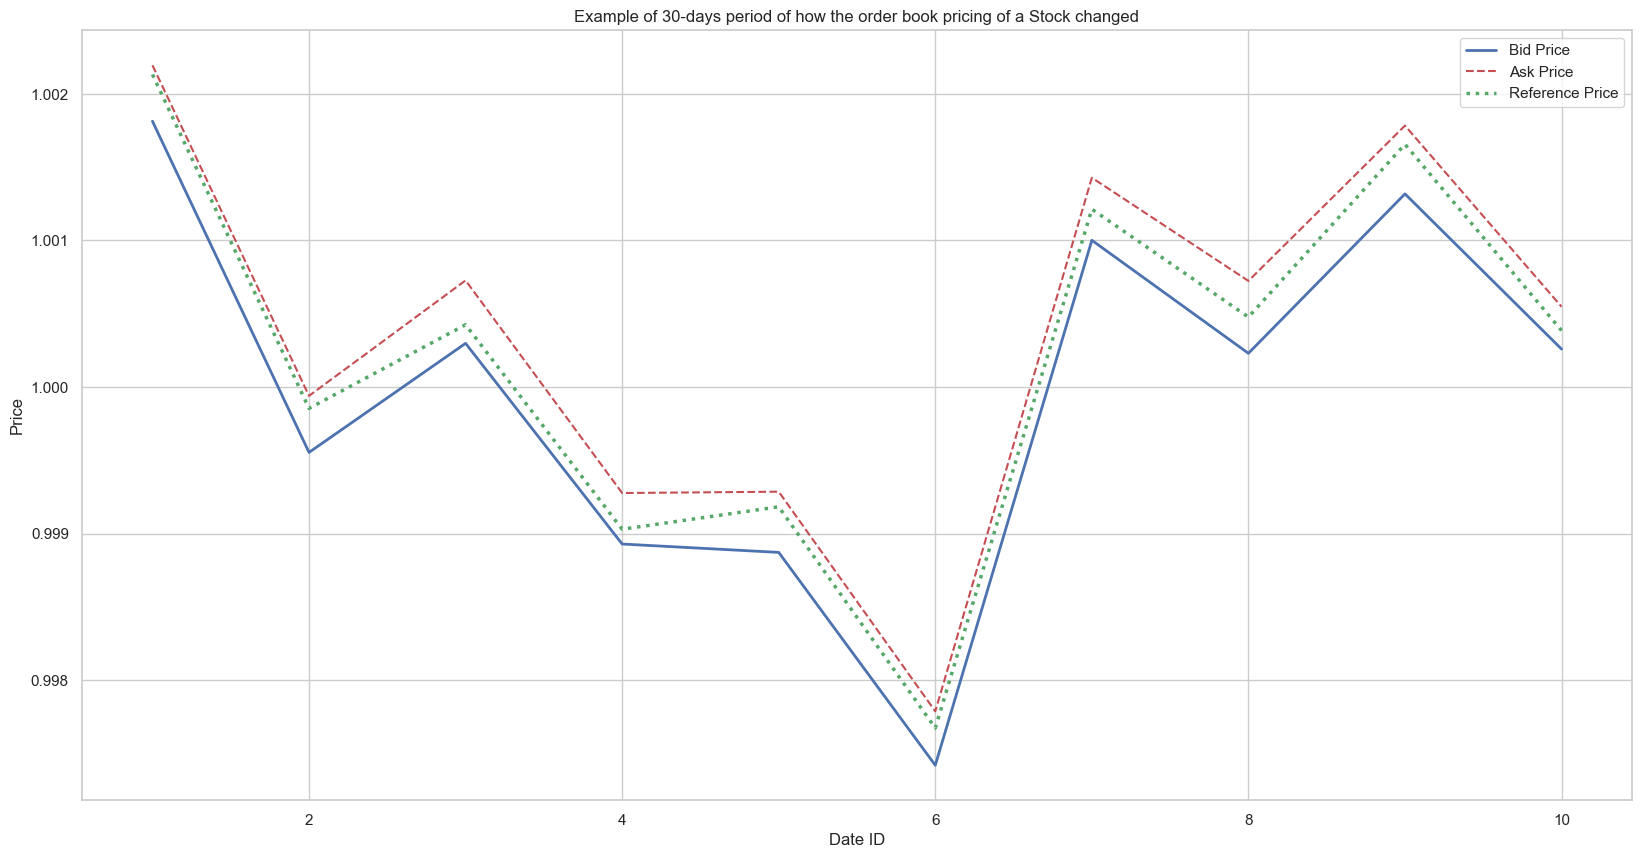

In [ ]:
# Noting that the example abouve with 480 deals does not have good visibility, I are choosing now the stock_id 5 only during 10 days only to ilustrate our example. 
data_filtered = new_df_outliers_removed.query('stock_id == 5 and 0 <= date_id <= 10')[['date_id', 'bid_price', 'ask_price', 'reference_price']].replace(0, np.nan).set_index('date_id')

# Start plotting
plt.figure(figsize=(20, 10))

# Plot each line separately
data_filtered['bid_price'].plot(style='b-', linewidth=2, label='Bid Price')
data_filtered['ask_price'].plot(style='r--', linewidth=1.5, label='Ask Price')
data_filtered['reference_price'].plot(style='g:', linewidth=2.5, label='Reference Price')

# Adding titles and labels
plt.title('Example of 10-days period of how the order book pricing of a Stock changed')
plt.xlabel('Date ID')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
data_filtered = new_df_outliers_removed.query('stock_id in [0, 1, 2, 3, 4] and 0 <= date_id <= 10')[['date_id', 'reference_price', 'stock_id']].replace(0, np.nan)

fig = px.scatter(data_filtered, x="date_id", y="reference_price", color="stock_id", title="Reference Price Trends for Stock IDs 0, 1, 2, 3, 4")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [97]:
print(new_df_outliers_removed.head())

   stock_id  date_id  reference_price  matched_size  imbalance_size  \
0         0        0         0.999664  2.064913e+07    1.229794e+06   
1         0        1         0.999050  9.342939e+06    1.175555e+06   
2         0        2         0.998940  1.306975e+07    1.593084e+04   
3         0        3         0.998883  1.414532e+07    5.396968e+06   
4         0        4         1.000689  1.882983e+07    4.132774e+06   

   bid_price      bid_size  ask_price  bid_ask_spread  
0   0.999547  36503.148364   0.999697        0.000150  
1   0.998903  39277.045455   0.999091        0.000188  
2   0.998895  34400.522909   0.999039        0.000144  
3   0.998834  45016.867818   0.999015        0.000181  
4   1.000637  31768.836727   1.000925        0.000288  


In [ ]:
##### Find below the steps completed so far during our analysis #####
## Seperate target & feature variable
## Choose the columns you want to have as your features
## Split data into training and testing set (e.g. split our data into 80% training and 20% test set)
## Standardize data
## scaler = StandardScaler()
## X_train = scaler.fit_transform(X_train)
## X_test = scaler.transform(X_test)
## Train model
## Test test our model and see its predictions
## Predictions on training set
## Testing pipelin
## Standardizing numeric features
## Predictions on test set
## Evaluate the model
## Print R^2 scores
    #print("R2 score on training set : ", regressor.score(X_train, y_train))
    #print("R2 score on test set : ", regressor.score(X_test, y_test))

In [ ]:
# Function to download stock data from Yahoo Finance
def download_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Function to split stock data into features (X) and target (y)
def split(stock_data):
    X = np.arange(len(stock_data)).reshape(-1, 1)
    y = stock_data['Close'].values
    return X, y

# Function to train the Linear Regression model
def train_the_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Function to predict stock price using the trained model
def predict_price(model, X_pred):
    predicted_price = model.predict(X_pred)
    return predicted_price

[*********************100%%**********************]  1 of 1 completed


Estimated price for 2024-04-01: 736.28
Estimated price for 2024-04-02: 738.24
Estimated price for 2024-04-03: 740.20
Estimated price for 2024-04-04: 742.17
Estimated price for 2024-04-05: 744.13
Estimated price for 2024-04-08: 746.10
Estimated price for 2024-04-09: 748.06
Estimated price for 2024-04-10: 750.02
Estimated price for 2024-04-11: 751.99
Estimated price for 2024-04-12: 753.95


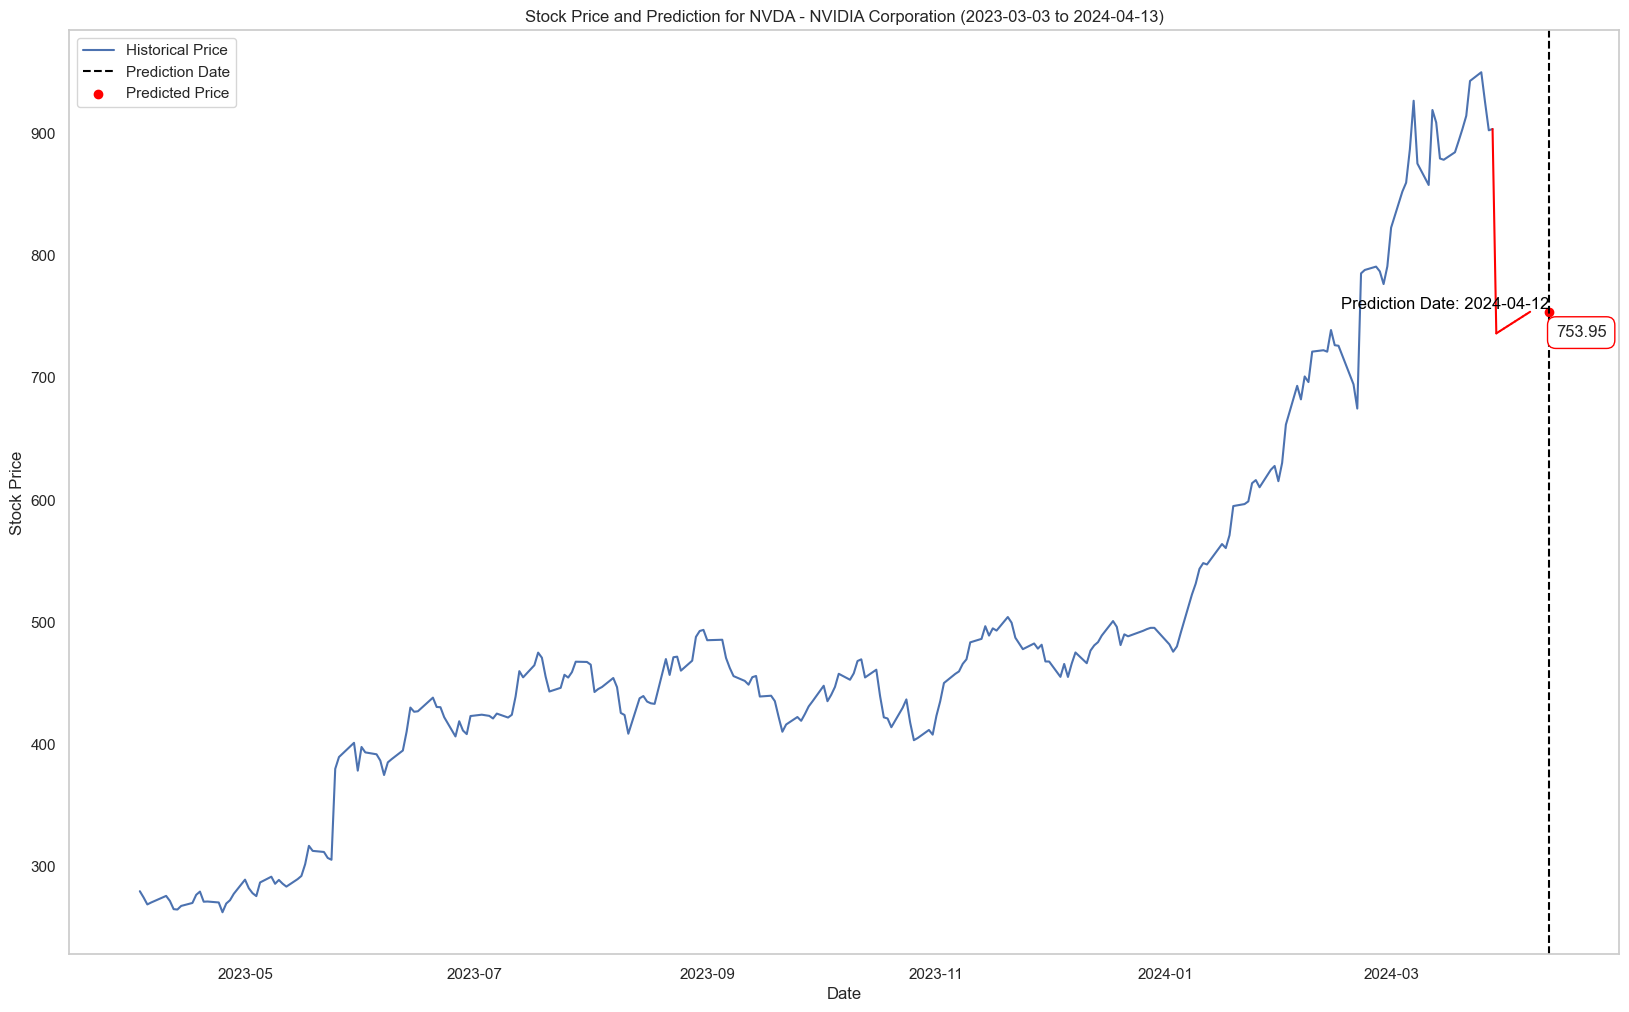

In [ ]:
## Choosing the stock NVIDIA with real historical prices (app. 1 Year) from yahoo finance library and tried to predict its expected prices for the last two weeks (1 April 2024 to 12 April 2024).
## https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282
##  Main function:

def main():
    # Stock symbol and date range
    stock_symbol = "NVDA"
    stock_full_name = "NVIDIA Corporation"
    start_date = "2023-04-03"
    end_date = "2024-03-31"
    prediction_date = "2024-04-12"

    # Download stock data
    stock_data = download_stock_data(stock_symbol, start_date, end_date)
    X_train, y_train = split(stock_data)

    # Train the Linear Regression model
    model = train_the_model(X_train, y_train)

    # Convert prediction date and end date to datetime objects
    prediction_date = datetime.strptime(prediction_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Generate prediction dates excluding weekends
    prediction_dates = []
    current_date = end_date + timedelta(days=1)
    while current_date <= prediction_date:
        if current_date.weekday() < 5:  # This checks that the day is Mon-Fri
            prediction_dates.append(current_date)
        current_date += timedelta(days=1)
    
    # Prepare X_pred based on the new prediction_dates
    last_date = stock_data.index[-1].date()  # Assuming this is the last date in your data
    X_pred = np.arange(len(stock_data), len(stock_data) + len(prediction_dates)).reshape(-1, 1)

    # Make predictions
    predicted_prices = predict_price(model, X_pred)

    # Print estimated prices for prediction dates
    for i, date in enumerate(prediction_dates):
        print(f"Estimated price for {date.strftime('%Y-%m-%d')}: {predicted_prices[i]:.2f}")

    # Plotting
    plt.figure(figsize=(20, 12))

    # Plot historical price
    plt.plot(stock_data.index.date, stock_data['Close'].values, label='Historical Price')

    # Plot vertical line for prediction date
    plt.axvline(x=prediction_date, color='black', linestyle='--', label='Prediction Date')


    # Plot prediction prices for each day up to the prediction date
    prediction_line_color = 'green' if predicted_prices[-1] > stock_data['Close'].iloc[-1] else 'red'
    for i in range(1, len(prediction_dates) + 1):
        plt.plot([stock_data.index[-1].date() + timedelta(days=i-1), stock_data.index[-1].date() + timedelta(days=i)],
                 [stock_data['Close'].iloc[-1] if i == 1 else predicted_prices[i-2], predicted_prices[i-1]],
                 color=prediction_line_color)
    
    # Plot predicted price point
    plt.scatter(prediction_date.date(), predicted_prices[-1], color=prediction_line_color, label='Predicted Price')
    plt.annotate(f'{predicted_prices[-1]:.2f}', xy=(prediction_date.date(), predicted_prices[-1]),
             xytext=(5, -15), textcoords='offset points', ha='left', va='center',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor=prediction_line_color, facecolor='white'))

    # Annotate the prediction date on the plot
    plt.text(prediction_date, predicted_prices[-1], f'Prediction Date: {prediction_date.strftime("%Y-%m-%d")}',
         verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=12)

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price and Prediction for {stock_symbol} - {stock_full_name} (2023-03-03 to 2024-04-13)')

    # Show legend, grid, and plot
    plt.legend()
    plt.grid()
    plt.show()

# Execute main function if the script is run directly
if __name__ == "__main__":
    main()

[*********************100%%**********************]  1 of 1 completed


Estimated price for 2024-04-01: 932.70
Estimated price for 2024-04-02: 936.34
Estimated price for 2024-04-03: 939.98
Estimated price for 2024-04-04: 943.63
Estimated price for 2024-04-05: 947.27
Estimated price for 2024-04-08: 950.92
Estimated price for 2024-04-09: 954.56
Estimated price for 2024-04-10: 958.21
Estimated price for 2024-04-11: 961.85
Estimated price for 2024-04-12: 965.50


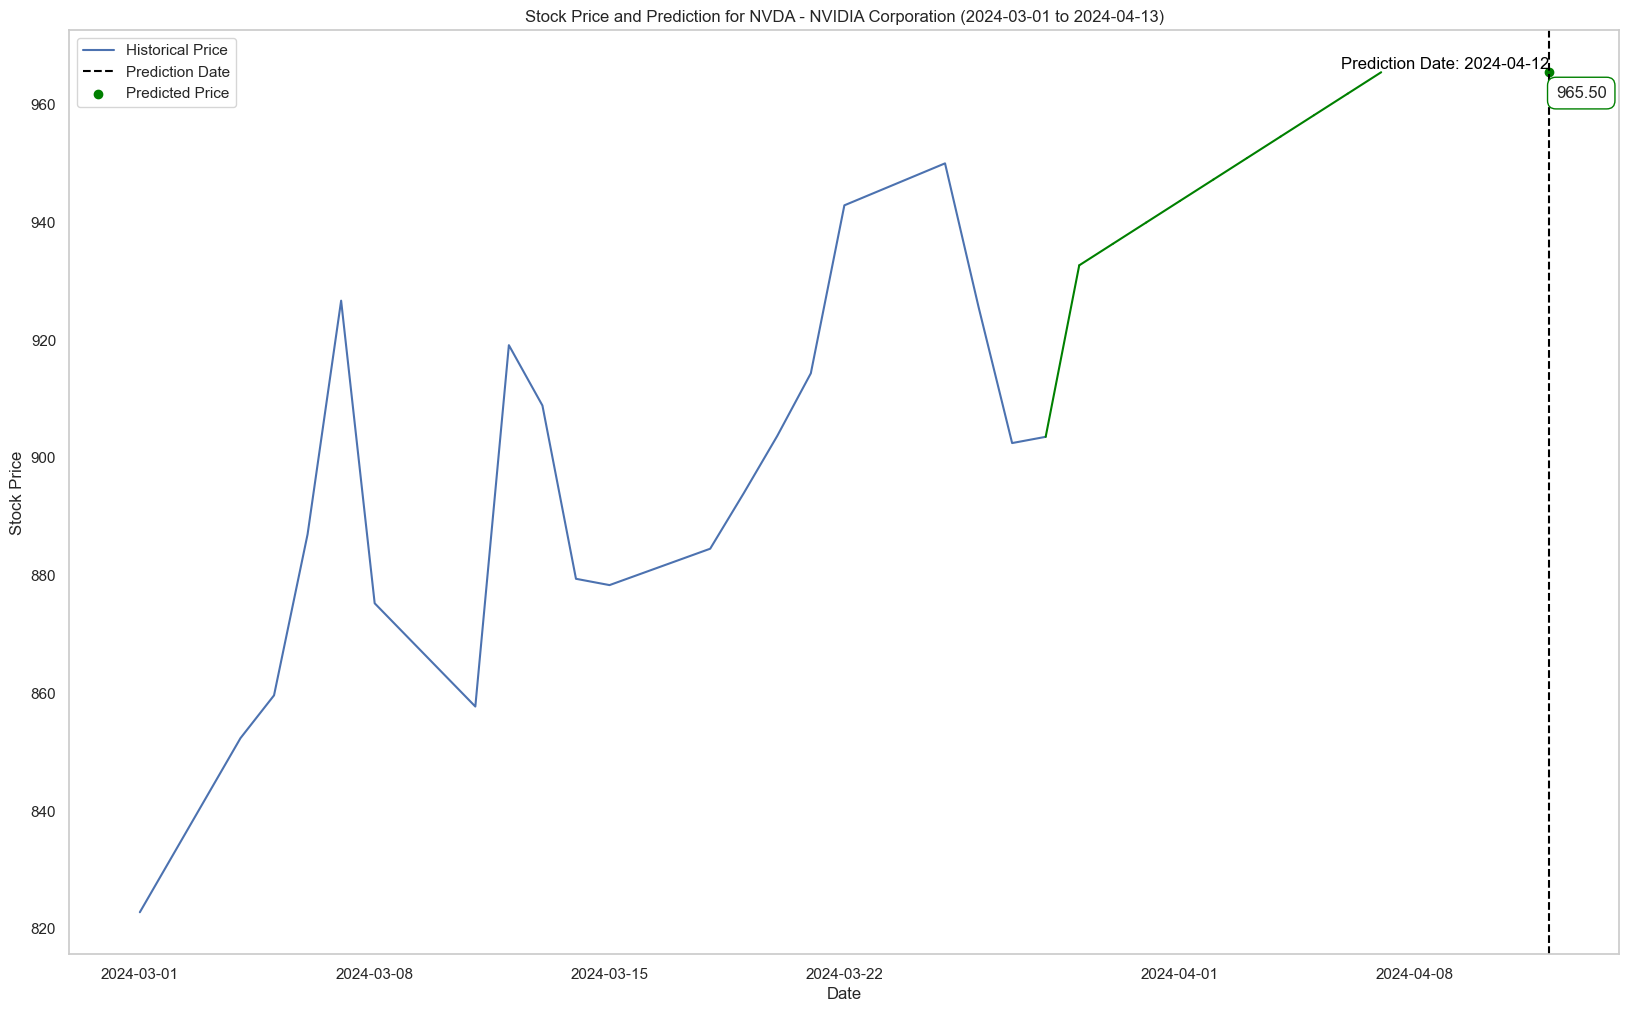

In [ ]:
## Choosing the stock NVIDIA with real historical prices (app. 1 Month) from yahoo finance library and tried to predict its expected prices for the last two weeks (1 April 2024 to 12 April 2024).
## https://medium.com/@kasperjuunge/yfinance-10-ways-to-get-stock-data-with-python-6677f49e8282
##  Main function:

def main():
    # Stock symbol and date range
    stock_symbol = "NVDA"
    stock_full_name = "NVIDIA Corporation"
    start_date = "2024-03-01"
    end_date = "2024-03-31"
    prediction_date = "2024-04-12"

    # Download stock data
    stock_data = download_stock_data(stock_symbol, start_date, end_date)
    X_train, y_train = split(stock_data)

    # Train the Linear Regression model
    model = train_the_model(X_train, y_train)

    # Convert prediction date and end date to datetime objects
    prediction_date = datetime.strptime(prediction_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # Generate prediction dates excluding weekends
    prediction_dates = []
    current_date = end_date + timedelta(days=1)
    while current_date <= prediction_date:
        if current_date.weekday() < 5:  # This checks that the day is Mon-Fri
            prediction_dates.append(current_date)
        current_date += timedelta(days=1)
    
    # Prepare X_pred based on the new prediction_dates
    last_date = stock_data.index[-1].date()  # Assuming this is the last date in your data
    X_pred = np.arange(len(stock_data), len(stock_data) + len(prediction_dates)).reshape(-1, 1)


    # Make predictions
    predicted_prices = predict_price(model, X_pred)

    # Print estimated prices for prediction dates
    for i, date in enumerate(prediction_dates):
        print(f"Estimated price for {date.strftime('%Y-%m-%d')}: {predicted_prices[i]:.2f}")

    # Plotting
    plt.figure(figsize=(20, 12))

    # Plot historical price
    plt.plot(stock_data.index.date, stock_data['Close'].values, label='Historical Price')

    # Plot vertical line for prediction date
    plt.axvline(x=prediction_date, color='black', linestyle='--', label='Prediction Date')

    # Plot prediction prices for each day up to the prediction date
    prediction_line_color = 'green' if predicted_prices[-1] > stock_data['Close'].iloc[-1] else 'red'
    for i in range(1, len(prediction_dates) + 1):
        plt.plot([stock_data.index[-1].date() + timedelta(days=i-1), stock_data.index[-1].date() + timedelta(days=i)],
                 [stock_data['Close'].iloc[-1] if i == 1 else predicted_prices[i-2], predicted_prices[i-1]],
                 color=prediction_line_color)
    
    # Plot predicted price point
    plt.scatter(prediction_date.date(), predicted_prices[-1], color=prediction_line_color, label='Predicted Price')
    plt.annotate(f'{predicted_prices[-1]:.2f}', xy=(prediction_date.date(), predicted_prices[-1]),
             xytext=(5, -15), textcoords='offset points', ha='left', va='center',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor=prediction_line_color, facecolor='white'))

    # Annotate the prediction date on the plot
    plt.text(prediction_date, predicted_prices[-1], f'Prediction Date: {prediction_date.strftime("%Y-%m-%d")}',
         verticalalignment='bottom', horizontalalignment='right', color='black', fontsize=12)

    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price and Prediction for {stock_symbol} - {stock_full_name} (2024-03-01 to 2024-04-13)')

    # Show legend, grid, and plot
    plt.legend()
    plt.grid()
    plt.show()

# Execute main function if the script is run directly
if __name__ == "__main__":
    main()

In [ ]:
##### The steps below were not part of this Mid-Project, but they will be used in the future to enhance our existing analysis and to find out about better models to fit our predictions #####

## Metric for evaluation https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

## from sklearn.model_selection import KFold, TimeSeriesSplit  ## Cross-validation techniques
## from sklearn.impute import KNNImputer, SimpleImputer
## from sklearn.metrics import accuracy_score, f1_score, classification_report

## https://catboost.ai/en/docs/concepts/python-quickstart
## pip install catboost
## import catboost as cbt
## from catboost import Pool, CatBoost, CatBoostRegressor, CatBoostClassifier
    # CatBoost regression
    # Xcatboost, ycatboost = new_df_outliers_removed(return_X_y=True)
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    # train_dataset = cb.Pool(X_train, y_train) 
    # test_dataset = cb.Pool(X_test, y_test)
    # model = cb.CatBoostRegressor(loss_function=’RMSE’)

## https://xgboost.readthedocs.io/en/stable/python/python_intro.html
## https://www.datacamp.com/tutorial/xgboost-in-python
## https://scikit-learn.org/stable/modules/cross_validation.html
## pip install xgboost
## import xgboost as xgb

## https://lightgbm.readthedocs.io/en/latest/Python-Intro.html
## pip install lightgbm
## import lightgbm as lgb

## from keras.models import Sequential  ## Sequential is used to initialize the neural network
## from keras.layers import LSTM  ## Long Short-Term Memory
## from keras.layers import SimpleRNN     ## Recurrent Neural Network     
## from keras.layers import GRU   ## Grated Recurrent Unit
## from keras.layers import Dense   ## Dense is used to add a fully connected layer to the neural network.

## https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
## https://www.tutorialspoint.com/scikit_learn/scikit_learn_boosting_methods.htm

## For reading stock data from yahoo
    # from pandas_datareader.data import DataReader
    # import yfinance as yf
    # pip install pandas-datareader ## Pandas-datareader is used to access public financial data from the Internet and import it into Python as a DataFrame.
    # from pandas_datareader import data as pdr
    # yf.pdr_override()
## Grab all the closing prices for the tech stock list into one DataFrame
    # closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

## from scipy.stats import bernoulli
## from scipy.stats import binom
## from scipy.stats import geom
## from scipy.stats import poisson
## from scipy.stats import uniform
## from scipy.stats import expon
## from scipy.stats import norm

## Disable warnings to keep the code clean
    # import warnings
    # warnings.filterwarnings("ignore")